In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
 
file_names = ['97.mat','105.mat','118.mat','130.mat','169.mat','185.mat','197.mat','209.mat','222.mat','234.mat']
 
for file in file_names:
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file}')
    print(list(data.keys()))


['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM']
['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM']
['__header__', '__version__', '__globals__', 'X130_DE_time', 'X130_FE_time', 'X130_BA_time', 'X130RPM']
['__header__', '__version__', '__globals__', 'X169_DE_time', 'X169_FE_time', 'X169_BA_time', 'X169RPM']
['__header__', '__version__', '__globals__', 'X185_DE_time', 'X185_FE_time', 'X185_BA_time', 'X185RPM']
['__header__', '__version__', '__globals__', 'X197_DE_time', 'X197_FE_time', 'X197_BA_time', 'X197RPM']
['__header__', '__version__', '__globals__', 'X209_DE_time', 'X209_FE_time', 'X209_BA_time', 'X209RPM']
['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM']
['__header__', '__version__', '__globals__', 'X234_DE_time', 'X234_FE_time', 'X2

In [2]:
# 采用驱动端数据
data_columns = ['X097_DE_time', 'X105_DE_time', 'X118_DE_time', 'X130_DE_time', 'X169_DE_time',
                'X185_DE_time','X197_DE_time','X209_DE_time','X222_DE_time','X234_DE_time']
columns_name = ['97','105','118','130','169','185','197','209','222',"234"]
data_12k_10c = pd.DataFrame()
for index in range(10):
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file_names[index]}')
    dataList = data[data_columns[index]].reshape(-1)
    data_12k_10c[columns_name[index]] = dataList[:119808]  # 121048  min: 121265
print(data_12k_10c.shape)
data_12k_10c

(119808, 10)


,97,105,118,130,169,185,197,209,222,234
0,0.053197,-0.083004,-0.002761,0.008528,-0.223836,-0.467813,0.002274,1.189431,-0.007959,0.104365
1,0.088662,-0.195734,-0.096324,0.423550,-0.209541,0.179004,-0.104948,-0.177866,0.025340,0.017462
2,0.099718,0.233419,0.113705,0.012995,0.345337,0.481295,0.082010,-0.774816,0.000162,0.116547
3,0.058621,0.103958,0.257297,-0.265175,0.158862,-0.158212,0.094027,0.501518,0.092913,0.371164
4,-0.004590,-0.181115,-0.058314,0.237155,-0.206617,-0.326819,-0.160081,0.993697,-0.007797,0.356951
...,...,...,...,...,...,...,...,...,...,...
119803,0.002712,0.046781,-0.239592,-0.122232,0.046781,-0.002274,-0.056920,-0.296850,0.018842,-0.024365
119804,0.016689,-0.071309,0.013482,-1.248720,-0.090314,-0.042883,0.048475,0.060913,-0.075370,-0.044264
119805,0.008762,-0.175917,0.217663,0.587609,0.026639,-0.027289,0.107100,0.148628,0.032162,0.042639
119806,-0.034004,-0.290759,-0.016081,0.352890,0.097136,-0.035736,-0.033332,-0.139288,0.152364,-0.059289


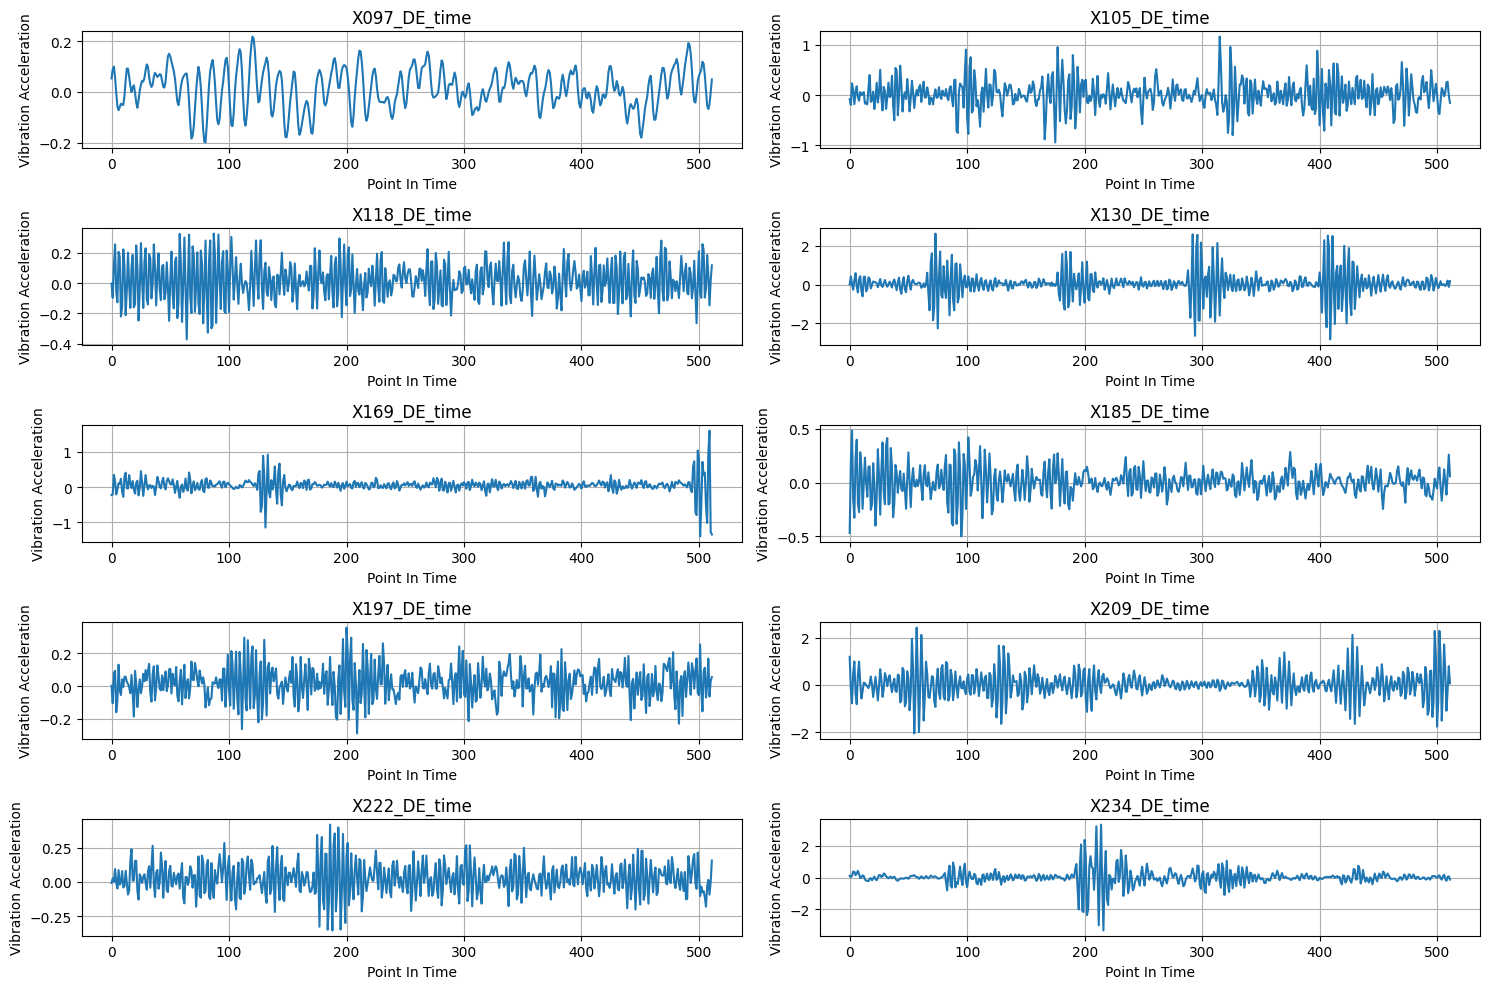

In [3]:
import matplotlib.pyplot as plt
# 创建一个包含10个子图的图表
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))  # 创建5行2列的子图
# 展示前10个子集，每个子集包含100个元素
for i, ax in enumerate(axes.flat):  # 扁平化子图数组，方便遍历
    series=data_12k_10c[columns_name[i]].iloc[:512]
    ax.plot(series.index, series.values)
    ax.set_title(data_columns[i])
    ax.set_xlabel('Point In Time')
    ax.set_ylabel('Vibration Acceleration')
    ax.grid(True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()
#看下时频图之间有较大区别，可使用一维时序转二维图像用于分类问题；

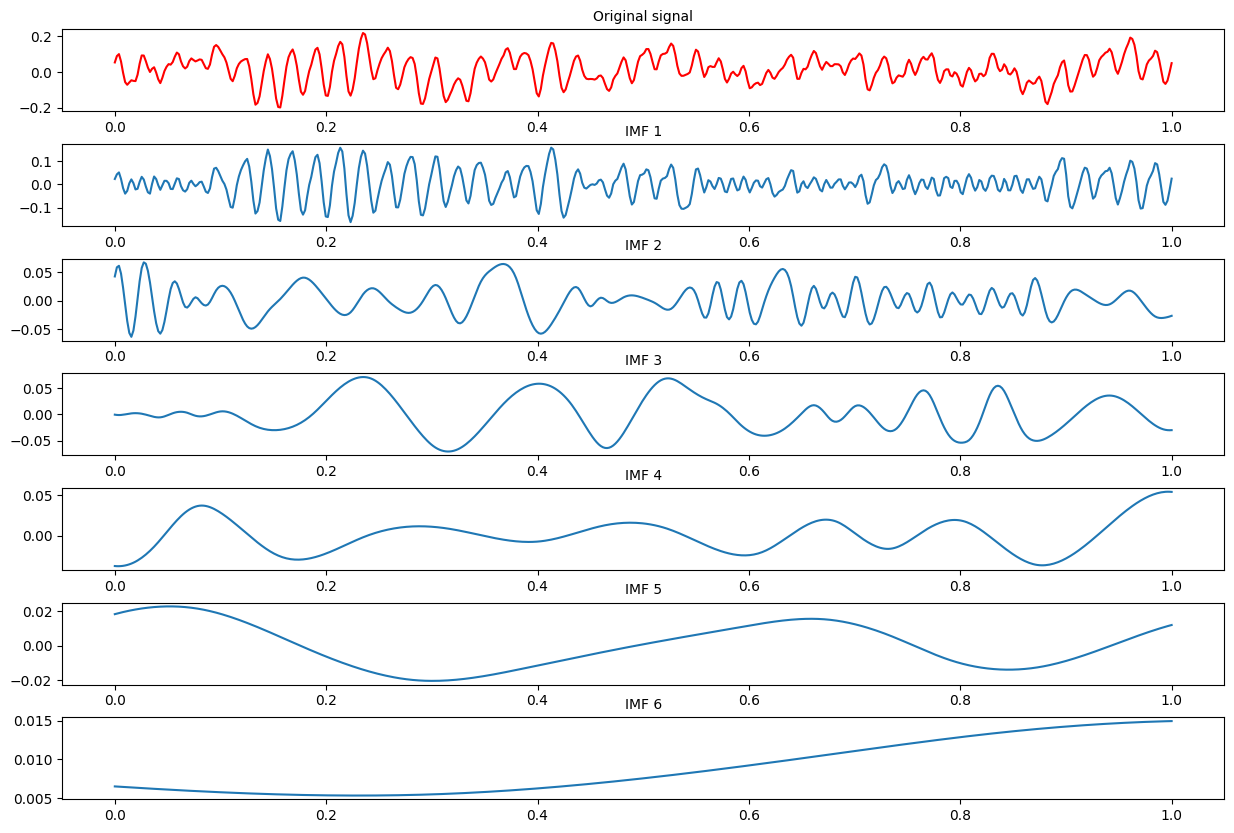

(6, 512)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD
 
t = np.linspace(0, 1, 512)
data = np.array(data_12k_10c[columns_name[0]].iloc[:512])
# 创建 EMD 对象
emd = EMD()
 
# 对信号进行经验模态分解
IMFs = emd(data)
 
# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(len(IMFs)+1, 1, 1)
plt.plot(t, data, 'r')
plt.title("Original signal", fontsize=10)
 
for num, imf in enumerate(IMFs):
    plt.subplot(len(IMFs)+1, 1, num+2)
    plt.plot(t, imf)
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()
IMFs.shape

In [5]:
# 定义滑动窗口大小和步长
window_size = 512
stride = int(window_size / 2)  # 此处使用了 50% 的重叠率
result_transpose_df=pd.DataFrame()
for futures_name in columns_name:
    data_array=data_12k_10c[futures_name]
    # 创建滑动窗口
    rolling_window = np.lib.stride_tricks.sliding_window_view(data_array, window_shape=window_size)
    # 提取具有给定步长的子数组
    rolling_window = rolling_window[::stride]
    for window_data in rolling_window:
        arr=window_data
        scalar_value = float(futures_name)
        # 使用 concatenate() 函数将标量追加到数组末尾
        new_arr = np.concatenate([arr, [scalar_value]])
        rolling_window_df=pd.DataFrame(new_arr)
                # 将滑动窗口中的数据组合成一个新的 DataFrame 对象
        result_transpose_df = pd.concat([result_transpose_df, rolling_window_df], axis=1, ignore_index=True)

result_df=result_transpose_df.transpose()
y_temp = result_df.iloc[:, -1:]
# 删除最后一列
result_df.drop(result_df.columns[-1], axis=1, inplace=True)
y_temp,result_df

(        512
 0      97.0
 1      97.0
 2      97.0
 3      97.0
 4      97.0
 ...     ...
 4665  234.0
 4666  234.0
 4667  234.0
 4668  234.0
 4669  234.0
 
 [4670 rows x 1 columns],
            0         1         2         3         4         5         6    \
 0     0.053197  0.088662  0.099718  0.058621 -0.004590 -0.056952 -0.071764   
 1     0.106602  0.127881  0.128090  0.101387  0.056535  0.015438  0.014812   
 2     0.077396  0.096589  0.098258  0.083863  0.036090 -0.037759 -0.093877   
 3     0.052988  0.019610 -0.000209  0.003964  0.002086  0.006258 -0.014186   
 4     0.134766  0.085115  0.015020 -0.029623 -0.040263 -0.015229  0.012308   
 ...        ...       ...       ...       ...       ...       ...       ...   
 4665  0.058071  0.036954  0.109644  0.161217  0.204262  0.098273 -0.116953   
 4666 -0.182740  0.624563  1.323034 -0.688725 -0.784968  2.427187  1.570342   
 4667 -0.108019 -0.129542 -0.032487 -0.023959 -0.091776 -0.034924  0.153095   
 4668 -0.025177 -0.126293 

In [6]:
import numpy as np
from PyEMD import EMD
from collections import Counter  
data=np.array(result_df)
# 创建 EMD 对象
ls=[]
emd = EMD()
all_imfs=[]
for i in range(len(data)):
    imfs = emd(data[i], max_imf=8) #一个长序列固有模态函数最大8个
    ls.append(len(imfs))
    all_imfs.append(imfs)
counter = Counter(ls)
counter

Counter({7: 3141, 8: 973, 6: 538, 5: 17, 9: 1})

In [14]:
y_array_temp=y_temp.to_numpy()
all_imfs_new=[]
y_new=[]
for i in range(len(all_imfs)):
    imfs=all_imfs[i]
    y_temp_new=y_array_temp[i]
    if len(imfs) > 8 :
        all_imfs_new.append(imfs[0:7])
        y_new.append(y_temp_new)
    elif len(imfs) < 7:
        pass
    elif len(imfs) == 7:
        all_imfs_new.append(imfs)
        y_new.append(y_temp_new)
all_imfs_new,y_new

([array([[ 0.05469388,  0.07396123,  0.07395498, ..., -0.00586525,
           0.02072837,  0.0142553 ],
         [ 0.01202668,  0.01245349,  0.00828047, ...,  0.01385353,
           0.02335041,  0.02319693],
         [-0.02279501, -0.02319531, -0.02042244, ..., -0.01001132,
          -0.01099759, -0.01082718],
         ...,
         [-0.01709793, -0.01724609, -0.01739441, ...,  0.00223328,
           0.0022779 ,  0.00231743],
         [ 0.00774655,  0.00781108,  0.00787374, ...,  0.00768327,
           0.00767295,  0.00766253],
         [ 0.01338886,  0.01338631,  0.01338373, ...,  0.01115198,
           0.01115133,  0.01115071]]),
  array([[ 0.10494535,  0.12581696,  0.12627393, ...,  0.03997004,
           0.07898644,  0.08025594],
         [-0.03500982, -0.03663943, -0.03523969, ...,  0.02916489,
           0.0360821 ,  0.04186161],
         [-0.01885327, -0.01957282, -0.02041792, ...,  0.01350369,
           0.01453937,  0.01545273],
         ...,
         [ 0.00549465,  0.0056474 

In [26]:
len(y_new)

3142

<Figure size 640x480 with 0 Axes>

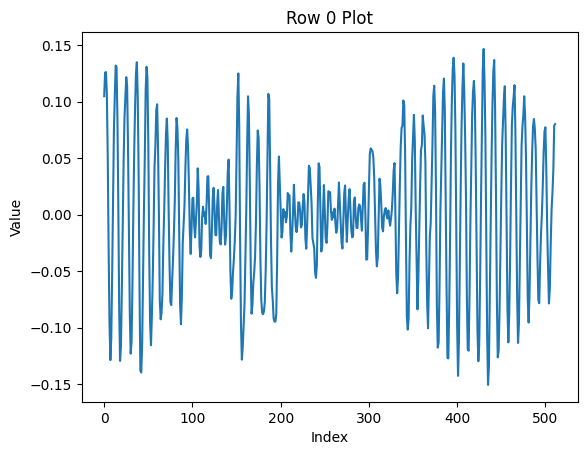

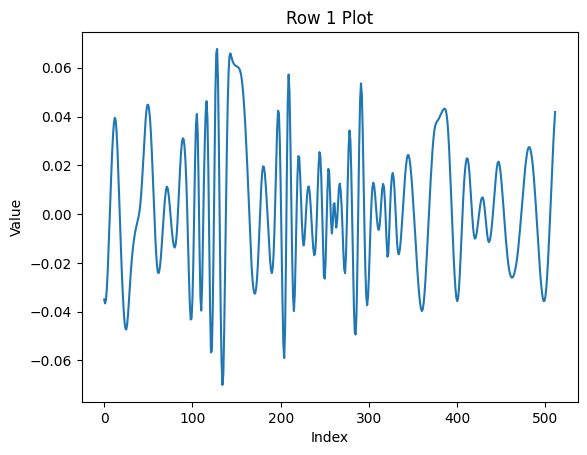

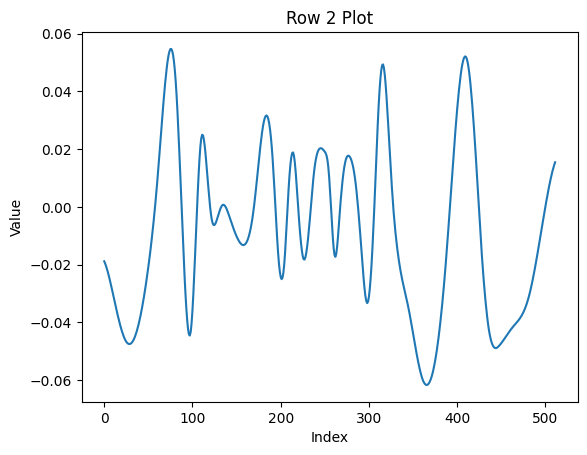

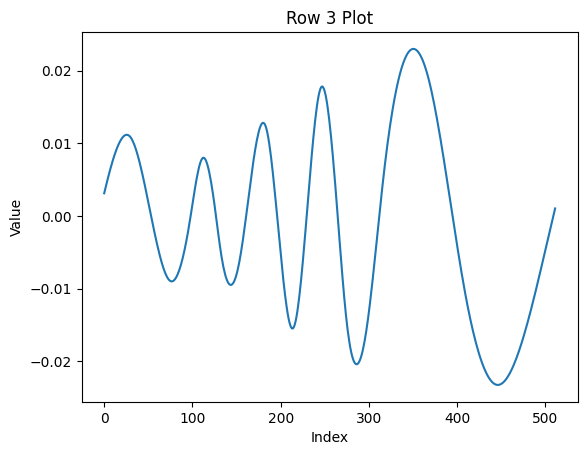

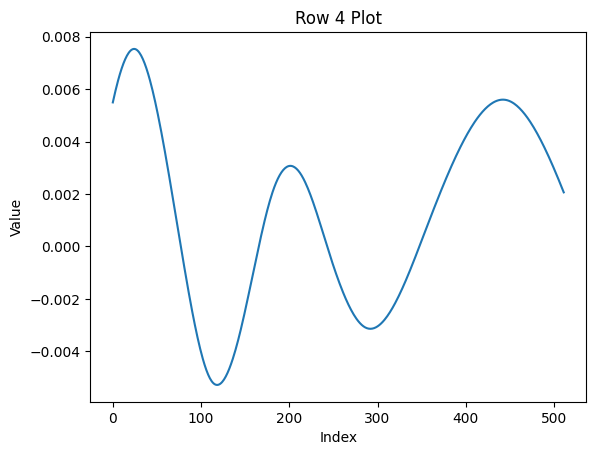

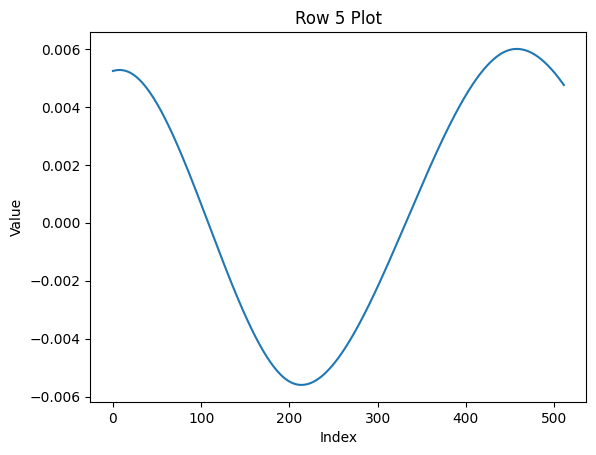

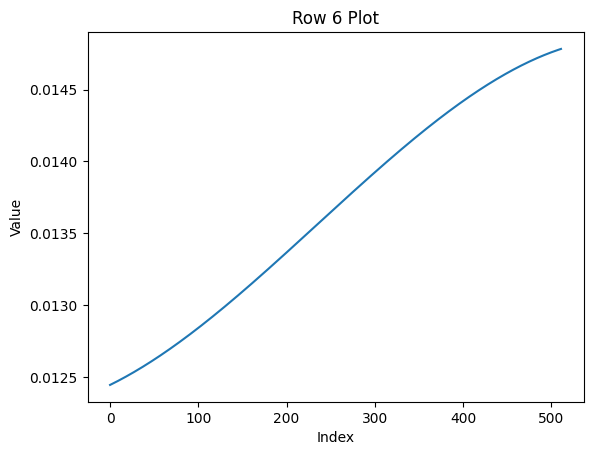

In [17]:
data=all_imfs_new[1]
  
# 使用循环遍历数组的每一行，但在同一图形上绘制  
plt.figure()  
for i, row in enumerate(data):  
    # 创建一个新的图形（如果你不想在同一图上绘制所有折线图）  
    plt.figure()  
      
    # 绘制当前行的折线图  
    plt.plot(row)  
      
    # 添加标题和标签（可选）  
    plt.title(f'Row {i} Plot')  
    plt.xlabel('Index')  
    plt.ylabel('Value')  
      
    # 显示图形（或你可以选择最后一次性地显示所有图形）  
    plt.show()

In [82]:
import torch  
import torch.nn as nn  
import torch.nn.functional as F  
from torch.utils.data import TensorDataset, DataLoader  

num_samples = 3142
input_data0 = torch.tensor(all_imfs_new)
input_data=input_data0.float() 
y1=torch.tensor(y_new) 
labels0=y1.reshape(3142)

# 假设你已经有了一个形状为(3142, 7, 512)的输入数据和对应的标签  
# 这里我们生成一些模拟数据  
# num_samples = 3142
# input_data = torch.randn(num_samples, 7, 512)  
labels = torch.randint(0, 10, (num_samples,))  # 假设的标签  

In [84]:
import torch  
  
# 假设你有一个形状为(3142,)的tensor，只包含10种不同的值  
# 这里我们随机生成一个示例tensor  
unique_values = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # 假设的10种不同值  
tensor = labels0 # 生成一个包含0到9的随机tensor  
  
# 创建一个字典来映射原始值到新的整数值  
# 我们先找到所有唯一值，并给它们分配一个新的整数值  
unique_vals, inverse_indices = torch.unique(tensor, return_inverse=True)  
label_encoder = {val.item(): idx for idx, val in enumerate(unique_vals)}  
  
# 使用字典来编码tensor中的值  
encoded_tensor = torch.tensor([label_encoder[val.item()] for val in tensor], dtype=torch.long)  
  
# 现在encoded_tensor包含了原始tensor的编码值  
labels = encoded_tensor

In [85]:

  
# 划分数据集（这里简单划分为训练集和测试集）  
train_size = int(0.8 * num_samples)  
test_size = num_samples - train_size  
train_dataset, test_dataset = torch.utils.data.random_split(TensorDataset(input_data, labels), [train_size, test_size])  
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  
  
# 自定义一个简单的Transformer编码器层（仅作为示例，可能需要调整）  
class SimpleTransformerEncoderLayer(nn.Module):  
    def __init__(self, d_model, nhead):  
        super(SimpleTransformerEncoderLayer, self).__init__()  
        self.self_attn = nn.MultiheadAttention(d_model, nhead)  
        self.linear1 = nn.Linear(d_model, d_model)  
        self.dropout = nn.Dropout(0.1)  
        self.linear2 = nn.Linear(d_model, d_model)  
          
        self.norm1 = nn.LayerNorm(d_model)  
        self.norm2 = nn.LayerNorm(d_model)  
        self.dropout1 = nn.Dropout(0.1)  
        self.dropout2 = nn.Dropout(0.1)  
  
    def forward(self, src, src_mask=None, src_key_padding_mask=None):  
        src2 = self.self_attn(src, src, src, attn_mask=src_mask,  
                              key_padding_mask=src_key_padding_mask)[0]  
        src = src + self.dropout1(src2)  
        src = self.norm1(src)  
          
        src2 = self.linear2(self.dropout(F.relu(self.linear1(src))))  
        src = src + self.dropout2(src2)  
        src = self.norm2(src)  
        return src  
  
# 定义Transformer模型  
class TransformerModel(nn.Module):  
    def __init__(self, d_model, nhead, num_layers, num_classes):  
        super(TransformerModel, self).__init__()  
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)  
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)  
        self.classifier = nn.Linear(d_model, num_classes)  
          
    def forward(self, src):  
        # 由于我们的输入是二维的，我们需要添加一个额外的维度来表示batch_size  
        # 但是对于Transformer来说，batch_size是第一个维度，所以我们不需要手动添加它  
        # 直接传入src即可  
        encoded = self.transformer_encoder(src)  # (batch_size, seq_len, d_model)  
        # 我们只取最后一个时间步的输出进行分类（或者可以对所有时间步进行平均）  
        output = encoded[:, -1, :]  # (batch_size, d_model)  
        output = self.classifier(output)  # (batch_size, num_classes)  
        return output  
  
# 初始化模型参数  
d_model = 512  # 输入和内部表示的维度  
nhead = 8  # 多头注意力中的头数  
num_layers = 1  # 编码器层数  
num_classes = 10

In [86]:
# 导入所需的库  
import torch  
import torch.nn as nn  
import torch.optim as optim  
    
  
# 初始化模型、损失函数和优化器  
model = TransformerModel(d_model, nhead, num_layers, num_classes)  
criterion = nn.CrossEntropyLoss()  # 多分类交叉熵损失  
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 使用Adam优化器  
  
# 训练模型  
def train(model, device, train_loader, optimizer, criterion, epoch):  
    model.train()  
    for batch_idx, (data, target) in enumerate(train_loader):  
        data, target = data.to(device), target.to(device)  
        optimizer.zero_grad()  # 清空之前的梯度  
        output = model(data)  # 前向传播  
        loss = criterion(output, target)  # 计算损失  
        loss.backward()  # 反向传播  
        optimizer.step()  # 更新权重  
        if batch_idx % 10 == 0:  # 每10个批次打印一次信息  
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(  
                epoch, batch_idx * len(data), len(train_loader.dataset),  
                100. * batch_idx / len(train_loader), loss.item()))  
  
# 定义测试函数（可选）  
def test(model, device, test_loader, criterion):  
    model.eval()  
    test_loss = 0  
    correct = 0  
    with torch.no_grad():  
        for data, target in test_loader:  
            data, target = data.to(device), target.to(device)  
            output = model(data)  
            test_loss += criterion(output, target).item()  # 累加测试损失  
            pred = output.argmax(dim=1, keepdim=True)  # 获取预测类别  
            correct += pred.eq(target.view_as(pred)).sum().item()  
  
    test_loss /= len(test_loader.dataset)  
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(  
        test_loss, correct, len(test_loader.dataset),  
        100. * correct / len(test_loader.dataset)))  
  
# 选择设备（CPU或GPU）  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  
model = model.to(device)  
  
# 训练多个epoch  
num_epochs = 10  
for epoch in range(1, num_epochs + 1):  
    train(model, device, train_loader, optimizer, criterion, epoch)  
    # 可以在每个epoch结束后添加test(model, device, test_loader, criterion)来测试模型

C:\Users\chell\anaconda3\envs\ClassifyBearing\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Train Epoch: 1 [0/2513 (0%)]	Loss: 2.403274
Train Epoch: 1 [320/2513 (13%)]	Loss: 2.804352
Train Epoch: 1 [640/2513 (25%)]	Loss: 2.258507
Train Epoch: 1 [960/2513 (38%)]	Loss: 2.144751
Train Epoch: 1 [1280/2513 (51%)]	Loss: 2.413365


KeyboardInterrupt: 